In [ ]:
import os
import re
import string

import pandas as pd
import numpy as np

from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import regularizers
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')



In [ ]:
main_data=pd.read_csv("train.csv")
data=main_data.copy()
data.drop(columns=['id'],axis=1,inplace=True)
data

,label,tweet
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0,bihday your majesty
3,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,0,listening to sad songs on a monday morning otw to work is sad
31960,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


,count
label,
0,29720
1,2242


0s : 1s  ::   13.26 : 1


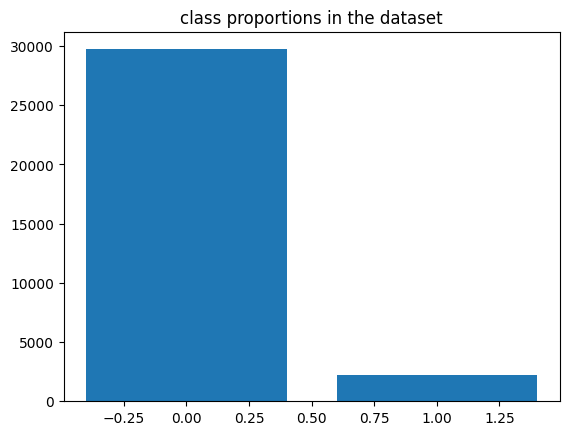

In [ ]:
display(data['label'].value_counts().to_frame())
print("0s : 1s  ::  ",(data['label'].value_counts()[0]/data['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],data['label'].value_counts())
plt.title("class proportions in the dataset")
plt.show()

#### we see that we have an unbalanced data mojority class to minority class ratio of 13 : 1

,count
label,
0,29720
1,6726


0s : 1s  ::   4.42 : 1


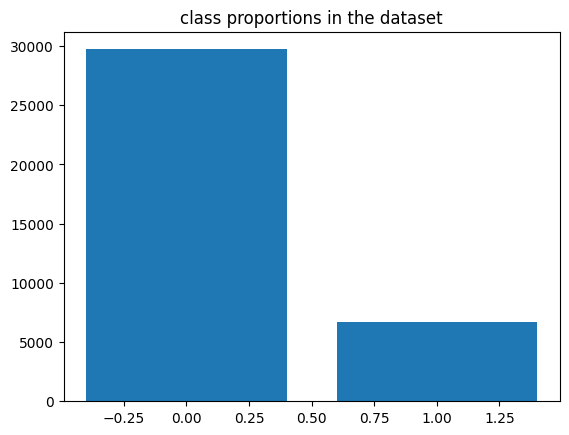

In [ ]:
#Balancing the dataset using Oversampling
data1=data[data['label']==1]
data0=data[data['label']==0]
data=pd.concat([data,data1,data1], axis=0)

display(data['label'].value_counts().to_frame())
print("0s : 1s  ::  ",(data['label'].value_counts()[0]/data['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],data['label'].value_counts())
plt.title("class proportions in the dataset")
plt.show()

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)


def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))])

    return text2.lower()

In [ ]:
data['tweet'] = data['tweet'].apply(remove_emoji)
data['tweet'] = data['tweet'].apply(clean_text)
data['Num_words_text'] = data['tweet'].apply(lambda x:len(str(x).split()))

train_data,test_data= train_test_split(data, test_size=0.2)
train_data.reset_index(drop=True,inplace=True)
test_data.reset_index(drop=True,inplace=True)

In [ ]:
print('===========Train Data =========')
print(train_data['label'].value_counts())
print(len(train_data))
print('==============================')

print('===========Test Data =========')
print(test_data['label'].value_counts())
print(len(test_data))
print('==============================')

===========Train Data =========
label
0    23779
1     5377
Name: count, dtype: int64
29156
===========Test Data =========
label
0    5941
1    1349
Name: count, dtype: int64
7290


In [ ]:
#train and validation dataset splitting
X_train, X_valid, y_train, y_valid = train_test_split(train_data['tweet'].tolist(),\
                                                      train_data['label'].tolist(),\
                                                      test_size=0.2,\
                                                      stratify = train_data['label'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

Train data len:23324
Class distributionCounter({0: 19023, 1: 4301})
Valid data len:5832
Class distributionCounter({0: 4756, 1: 1076})


In [ ]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)

In [ ]:
# Convert sentences to sequences and pad
x_train = tokenizer.texts_to_sequences(X_train)
x_valid = tokenizer.texts_to_sequences(X_valid)
x_test  = tokenizer.texts_to_sequences(test_data['tweet'].tolist())

maxlen = 50
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_valid = pad_sequences(x_valid, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

x_train = np.array(x_train)
x_valid = np.array(x_valid)
x_test = np.array(x_test)

# Prepare labels
train_labels = np.asarray(y_train)
valid_labels = np.asarray(y_valid)
test_labels = np.asarray(test_data['label'].tolist())

print('Train data len:' + str(len(x_train)))
print('Class distribution' + str(Counter(train_labels)))

print('Validation data len:' + str(len(x_valid)))
print('Class distribution' + str(Counter(valid_labels)))

print('Test data len:' + str(len(x_test)))
print('Class distribution' + str(Counter(test_labels)))

train_ds = tf.data.Dataset.from_tensor_slices((x_train, train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, test_labels))

Train data len:23324
Class distributionCounter({0: 19023, 1: 4301})
Validation data len:5832
Class distributionCounter({0: 4756, 1: 1076})
Test data len:7290
Class distributionCounter({0: 5941, 1: 1349})


In [ ]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==1:
        break

======Train dataset ====
tf.Tensor(
[12388 12389     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int64)
======Validation dataset ====
tf.Tensor(
[   1   37 1003    1  549  754    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int64)
======Test dataset ====
tf.Tensor(
[ 855 1824 3421    2    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

In [ ]:
#model preparation
max_features =50000
embedding_dim =16
sequence_length = maxlen

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))




model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10
history = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1024),
                    verbose=1)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 235ms/step - binary_accuracy: 0.7666 - loss: 3.7604 - val_binary_accuracy: 0.8155 - val_loss: 1.5599
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - binary_accuracy: 0.8149 - loss: 1.3121 - val_binary_accuracy: 0.8155 - val_loss: 0.7837
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - binary_accuracy: 0.8163 - loss: 0.7577 - val_binary_accuracy: 0.8155 - val_loss: 0.5915
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - binary_accuracy: 0.8155 - loss: 0.5967 - val_binary_accuracy: 0.8155 - val_loss: 0.4906
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - binary_accuracy: 0.8422 - loss: 0.5028 - val_binary_accuracy: 0.9316 - val_loss: 0.4077
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - binary_accuracy: 0.9265 - loss: 0.4198 - val_binary_accuracy: 0.9458 - val_loss: 0.3518
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - binary_accuracy: 0.9501 - loss: 0.3538 - val_binary_accuracy: 0.9530 - val_loss: 0.3310
Epoch 

In [ ]:
valid_predict= model.predict(x_valid)
print(valid_predict[:10])

183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[[8.4150769e-04]
 [9.8386735e-01]
 [3.5998791e-03]
 [1.2861484e-03]
 [7.1268983e-02]
 [8.8813549e-01]
 [8.1763697e-05]
 [2.3913836e-01]
 [1.2061457e-02]
 [8.4851092e-01]]


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_test  = tokenizer.texts_to_sequences(test_data['tweet'].tolist())
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

predictions = model.predict(x_test)


228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


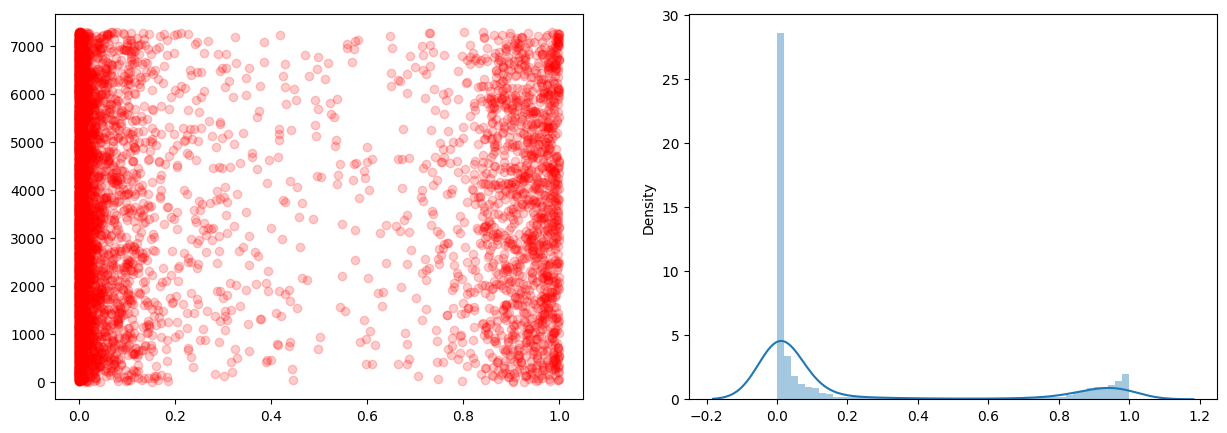

In [ ]:
#plot
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.scatter(predictions,range(0,len(predictions)),alpha=0.2,color='red')
ax2=sns.distplot(predictions)

In [ ]:
cutoff=0.86
test_data['pred_sentiment']= predictions
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment >= cutoff),1,test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment < cutoff),0,test_data.pred_sentiment)

labels = [0, 1]
print(classification_report(test_data['label'].tolist(),test_data['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5941
           1       0.96      0.82      0.88      1349

    accuracy                           0.96      7290
   macro avg       0.96      0.91      0.93      7290
weighted avg       0.96      0.96      0.96      7290



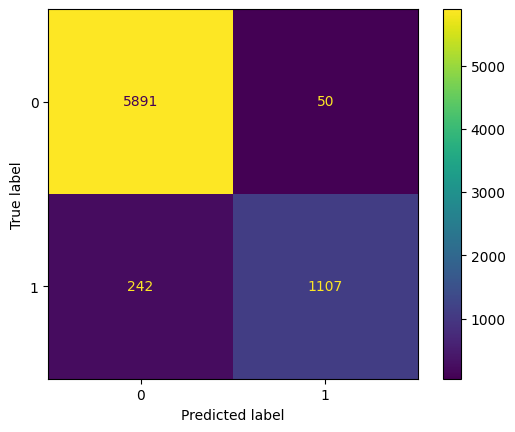

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_data['label'].tolist(), test_data['pred_sentiment'].tolist(), labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

## TESTING MODEL ON THE TEST DATASET PROVIDED

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

final_test=pd.read_csv("test.csv")
ftest=final_test.copy()
ftest.drop(columns=['id'],axis=1,inplace=True)

ftest['tweet'] = ftest['tweet'].apply(remove_emoji)
ftest['tweet'] = ftest['tweet'].apply(clean_text)

f_test  = tokenizer.texts_to_sequences(ftest['tweet'].tolist())
f_test = pad_sequences(f_test, padding='post', maxlen=maxlen)
f_test = np.array(f_test)


display((x_test))
display((f_test))

array([[ 855, 1824, 3421, ...,    0,    0,    0],
       [ 409,  588,  209, ...,    0,    0,    0],
       [   2,   12,   39, ...,    0,    0,    0],
       ...,
       [   1, 7984, 3693, ...,    0,    0,    0],
       [6249, 6249,    1, ...,    0,    0,    0],
       [  62,   38, 4868, ...,    0,    0,    0]], dtype=int32)

array([[10196,     1,  4848, ...,     0,     0,     0],
       [    2,    65, 14222, ...,     0,     0,     0],
       [  689,   728,   853, ...,     0,     0,     0],
       ...,
       [    9,    33,   320, ...,     0,     0,     0],
       [  329,   708,   117, ...,     0,     0,     0],
       [  247,  1051,  7570, ...,     0,     0,     0]], dtype=int32)

In [ ]:
predictions = model.predict(f_test)

538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


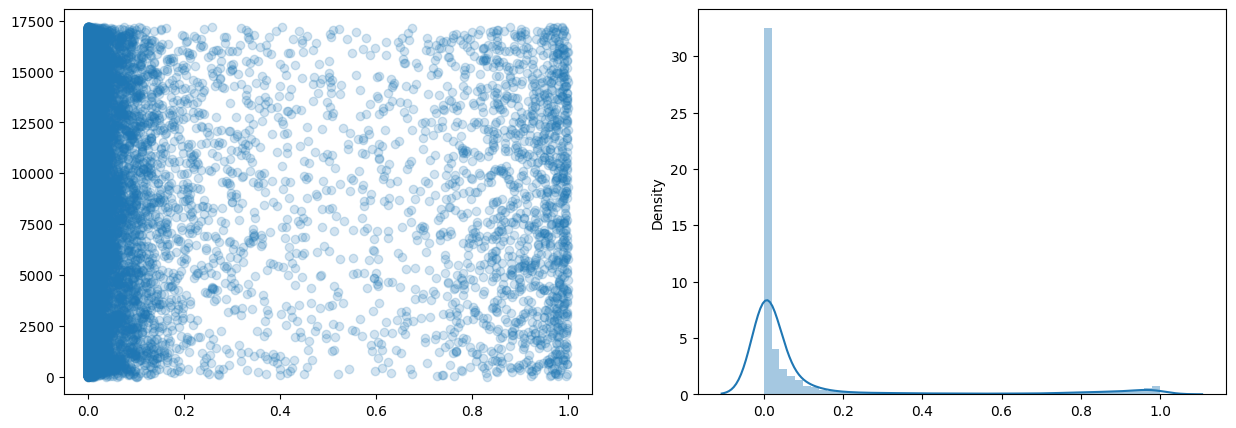

In [ ]:
#plot predictions
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.scatter(predictions,ftest.index,alpha=0.2)
ax2=sns.distplot(predictions)

In [ ]:
ftest['pred_sentiment']= predictions
ftest['pred_sentiment'] = np.where((ftest.pred_sentiment >= cutoff),1,ftest.pred_sentiment)
ftest['pred_sentiment'] = np.where((ftest.pred_sentiment < cutoff),0,ftest.pred_sentiment)

#processed tweets categorized as hate speech
pd.set_option('display.max_colwidth', None)
ftest[ftest['pred_sentiment']==1]

,tweet,pred_sentiment
19,thought factory neutrality right wing fascism politics media brexit trump leadership,1.0
26,chick gets fucked hottest naked lady,1.0
33,suppo taiji fisherman bullying racism tweet4taiji thecove seashepherd,1.0
34,because speaking collectively always known showed andâ¦,1.0
110,user ivanka bracelet feel good profiting from xenophobia misogyny hatred grabyourwallet,1.0
...,...,...
17148,grew fucked upð¤ fucked upð¥ believing better place fucking upð© âï¸,1.0
17176,user user most racist ever,1.0
17188,black professor demonizes proposes nazi style confiscation white assets like 1930s germany breaking,1.0
17192,thought factory leftright polarisation trump uselections2016 leadership politics brexit,1.0


In [ ]:
final_test.iloc[ftest[ftest['pred_sentiment']==1].index]

,id,tweet
19,31982,thought factory: bbc neutrality on right wing fascism #politics #media #blm #brexit #trump #leadership &gt;3
26,31989,chick gets fucked hottest naked lady
33,31996,suppo the #taiji fisherman! no bullying! no racism! #tweet4taiji #thecove #seashepherd
34,31997,i say we because i'm speaking collectively. i've always known. 2016 showed a lot. andâ¦
110,32073,hey @user - a $14000 ivanka bracelet? do you feel good profiting from #xenophobia? #misogyny? #hatred? ? #grabyourwallet
...,...,...
17148,49111,we grew up fucked upð¤ its fucked upð¥ i'm believing you in a better place but it's fucking me upð© Ã¨ âï¸
17176,49139,@user @user are the most racist pay ever!!!!!
17188,49151,"black professor demonizes, proposes nazi style confiscation of ""white"" assets; like 1930's germany #breaking"
17192,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
